## **Project : Estimation of Energy Usage by Accelerometric Analysis Methodology**

*Our study proposes an approach: precisely characterising the energy usage of different exercises using an AX3 accelerometer, we will dissect the biomechanical characteristics of three emblematic exercises: boxing, running and jumping jacks.* 

### 1. Data collection and pre-processing

##### **Packages**


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


##### **Reading data**

In [187]:
import pandas as pd

filename1 = "../data/running_DATA.resampled.csv"
filename2 = "../data/boxe_DATA.resampled.csv"
filename3 = "../data/jump_DATA.resampled.csv"

acc_run = pd.read_csv(filename1,sep=",") # running accelerometrer data
acc_box = pd.read_csv(filename2,sep=",") # boxing accelerometrer data
acc_jump = pd.read_csv(filename3,sep=",") # jumping jacks accelerometrer data


In [188]:
print(acc_run)
print(acc_box)
print(acc_jump)

                          Time  Accel-X (g)   Accel-Y (g)   Accel-Z (g)
0      2024-11-26 22:30:00.000     0.000000      0.000000      0.000000
1      2024-11-26 22:30:00.009     0.000000      0.000000      0.000000
2      2024-11-26 22:30:00.019     0.000000      0.000000      0.000000
3      2024-11-26 22:30:00.029     0.000000      0.000000      0.000000
4      2024-11-26 22:30:00.039     0.000000      0.000000      0.000000
...                        ...          ...           ...           ...
89995  2024-11-26 22:44:59.950    -0.972168      0.244141     -0.270264
89996  2024-11-26 22:44:59.960    -0.890381      0.205566     -0.285400
89997  2024-11-26 22:44:59.970    -0.821777      0.171387     -0.274170
89998  2024-11-26 22:44:59.980    -0.779785      0.126221     -0.239502
89999  2024-11-26 22:44:59.990    -0.734131      0.102295     -0.205078

[90000 rows x 4 columns]
                          Time  Accel-X (g)   Accel-Y (g)   Accel-Z (g)
0      2024-11-26 23:23:00.000     0.0

##### **Plot data**

<Axes: >

<Figure size 1900x600 with 0 Axes>

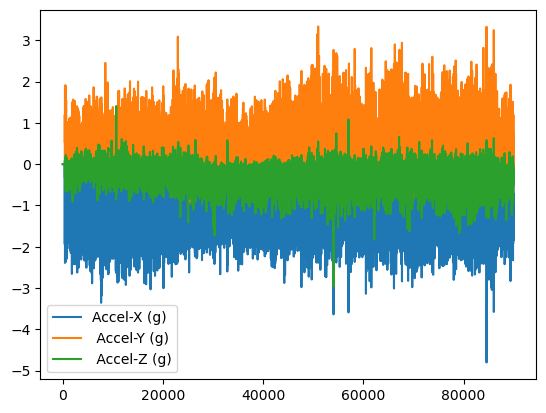

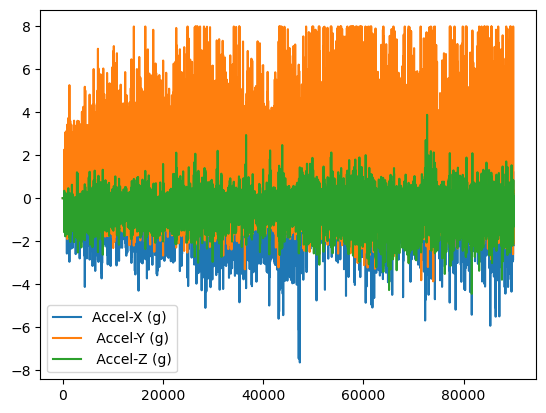

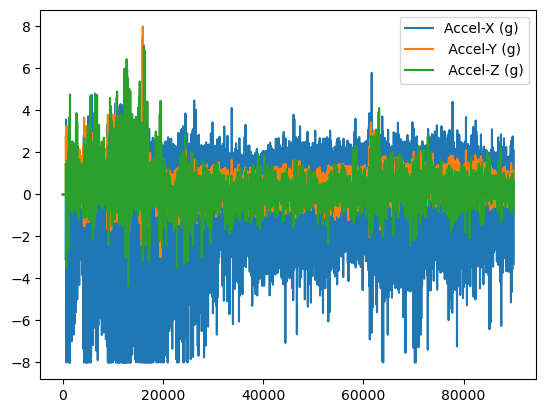

In [189]:
import matplotlib.pyplot as plt # for plotting and graphing data

plt.figure(figsize=(19,6))

acc_run.plot()
acc_box.plot()
acc_jump.plot()

##### **Scaling**

In [195]:
# Add new columns for the filter
acc_run['filtered_Accel_X']=""
acc_run['filtered_Accel_Y']=""
acc_run['filtered_Accel_Z']=""
acc_box['filtered_Accel_X']=""
acc_box['filtered_Accel_Y']=""
acc_box['filtered_Accel_Z']=""
acc_jump['filtered_Accel_X']=""
acc_jump['filtered_Accel_Y']=""
acc_jump['filtered_Accel_Z']=""



In [191]:
def scaling (acc_data): 
    acc_data.columns = ['Time', 'Accel-X (g)', 'Accel-Y (g)','Accel-Z (g)','filtered_Accel_X', 'filtered_Accel_Y','filtered_Accel_Z']
    acc_ = acc_data.drop('Time', axis=1)
    acc_time = acc_data[['Time']]
    acc_x = acc_data[['Accel-X (g)']]
    acc_y = acc_data[['Accel-Y (g)']]
    acc_z = acc_data[['Accel-Z (g)']]
    
    return acc_time,acc_,acc_x,acc_y,acc_z


In [192]:
# Scaling function
acc_time,Acc_run,Acc_xR,Acc_yR,Acc_zR=scaling(acc_run)
acc_time,Acc_box,Acc_xB,Acc_yB,Acc_zB=scaling(acc_box)
acc_time,Acc_jump,Acc_xJ,Acc_yJ,Acc_zJ=scaling(acc_jump)

In [193]:
import numpy as np
np.shape(acc_run)

(90000, 7)

In [194]:
import numpy as np
duration = 90000 / 100  # échantillonné à 100 
print(duration)
time = np.linspace(0, duration, 90000)
print(time)

900.0
[0.00000000e+00 1.00001111e-02 2.00002222e-02 ... 8.99980000e+02
 8.99990000e+02 9.00000000e+02]


### 2. Visualisation and analysis

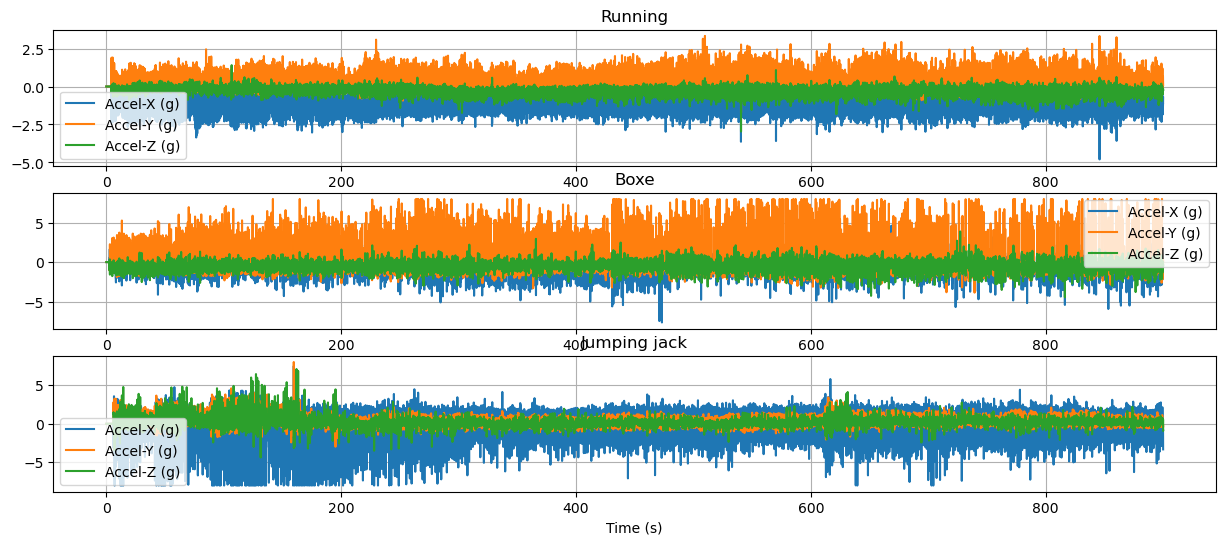

In [196]:
import matplotlib.pyplot as plt # pour tracer et visualiser les données sous forme de graphiques

plt.figure(figsize=(15,6))

plt.subplot(3,1,1)

plt.plot(time,Acc_xR)
plt.plot(time,Acc_yR)
plt.plot(time,Acc_zR)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Running')
plt.gca().legend(('Accel-X (g)','Accel-Y (g)','Accel-Z (g)'))
plt.grid()

plt.subplot(3,1,2)

plt.plot(time,Acc_xB)
plt.plot(time,Acc_yB)
plt.plot(time,Acc_zB)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Boxe')
plt.gca().legend(('Accel-X (g)','Accel-Y (g)','Accel-Z (g)'))
plt.grid()

plt.subplot(3,1,3)

plt.plot(time,Acc_xJ)
plt.plot(time,Acc_yJ)
plt.plot(time,Acc_zJ)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Jumping jack')
plt.gca().legend(('Accel-X (g)','Accel-Y (g)','Accel-Z (g)'))
plt.grid()

##### **Filter**

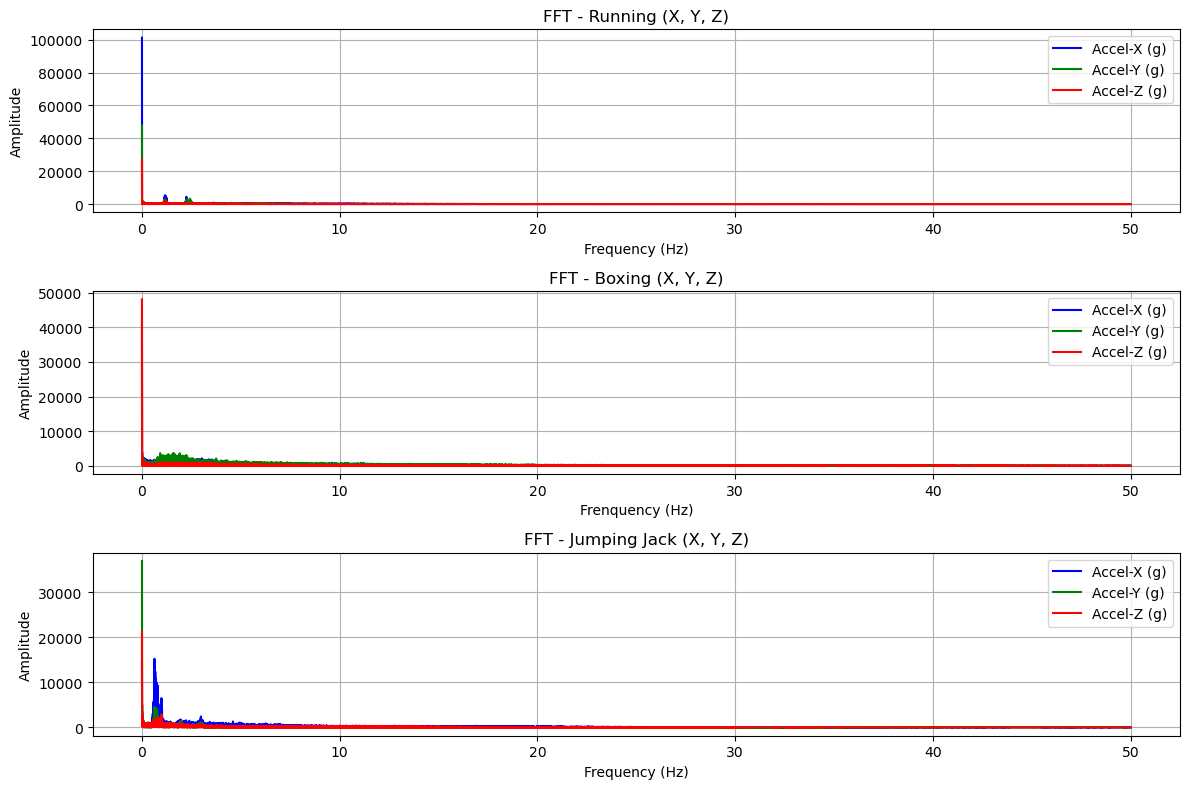

In [198]:
# Visualisation of dominant frequencies

import numpy as np
import matplotlib.pyplot as plt


fs = 100  # rate

# FFT application
fft_run_x = np.fft.fft(Acc_run['Accel-X (g)'])
fft_run_y = np.fft.fft(Acc_run['Accel-Y (g)'])
fft_run_z = np.fft.fft(Acc_run['Accel-Z (g)'])

fft_box_x = np.fft.fft(Acc_box['Accel-X (g)'])
fft_box_y = np.fft.fft(Acc_box['Accel-Y (g)'])
fft_box_z = np.fft.fft(Acc_box['Accel-Z (g)'])

fft_jump_x = np.fft.fft(Acc_jump['Accel-X (g)'])
fft_jump_y = np.fft.fft(Acc_jump['Accel-Y (g)'])
fft_jump_z = np.fft.fft(Acc_jump['Accel-Z (g)'])


frequencies = np.fft.fftfreq(len(Acc_run['Accel-X (g)']), 1/fs)

# plot
plt.figure(figsize=(12, 8))


plt.subplot(3, 1, 1)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_run_x)[:len(frequencies)//2], label='Accel-X (g)', color='blue')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_run_y)[:len(frequencies)//2], label='Accel-Y (g)', color='green')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_run_z)[:len(frequencies)//2], label='Accel-Z (g)', color='red')


plt.title('FFT - Running (X, Y, Z)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_box_x)[:len(frequencies)//2], label='Accel-X (g)', color='blue')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_box_y)[:len(frequencies)//2], label='Accel-Y (g)', color='green')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_box_z)[:len(frequencies)//2], label='Accel-Z (g)', color='red')

plt.title('FFT - Boxing (X, Y, Z)')
plt.xlabel('Frenquency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


plt.subplot(3, 1, 3)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_jump_x)[:len(frequencies)//2], label='Accel-X (g)', color='blue')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_jump_y)[:len(frequencies)//2], label='Accel-Y (g)', color='green')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_jump_z)[:len(frequencies)//2], label='Accel-Z (g)', color='red')


plt.title('FFT - Jumping Jack (X, Y, Z)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [40]:
pip install scipy

2332.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.


                          Time  Accel-X (g)  Accel-Y (g)  Accel-Z (g)  \
0      2024-11-26 22:30:00.000     0.000000     0.000000     0.000000   
1      2024-11-26 22:30:00.009     0.000000     0.000000     0.000000   
2      2024-11-26 22:30:00.019     0.000000     0.000000     0.000000   
3      2024-11-26 22:30:00.029     0.000000     0.000000     0.000000   
4      2024-11-26 22:30:00.039     0.000000     0.000000     0.000000   
...                        ...          ...          ...          ...   
89995  2024-11-26 22:44:59.950    -0.972168     0.244141    -0.270264   
89996  2024-11-26 22:44:59.960    -0.890381     0.205566    -0.285400   
89997  2024-11-26 22:44:59.970    -0.821777     0.171387    -0.274170   
89998  2024-11-26 22:44:59.980    -0.779785     0.126221    -0.239502   
89999  2024-11-26 22:44:59.990    -0.734131     0.102295    -0.205078   

       filtered_Accel_X  filtered_Accel_Y  filtered_Accel_Z  
0          5.432318e-22     -2.814477e-22      1.141478e-22  

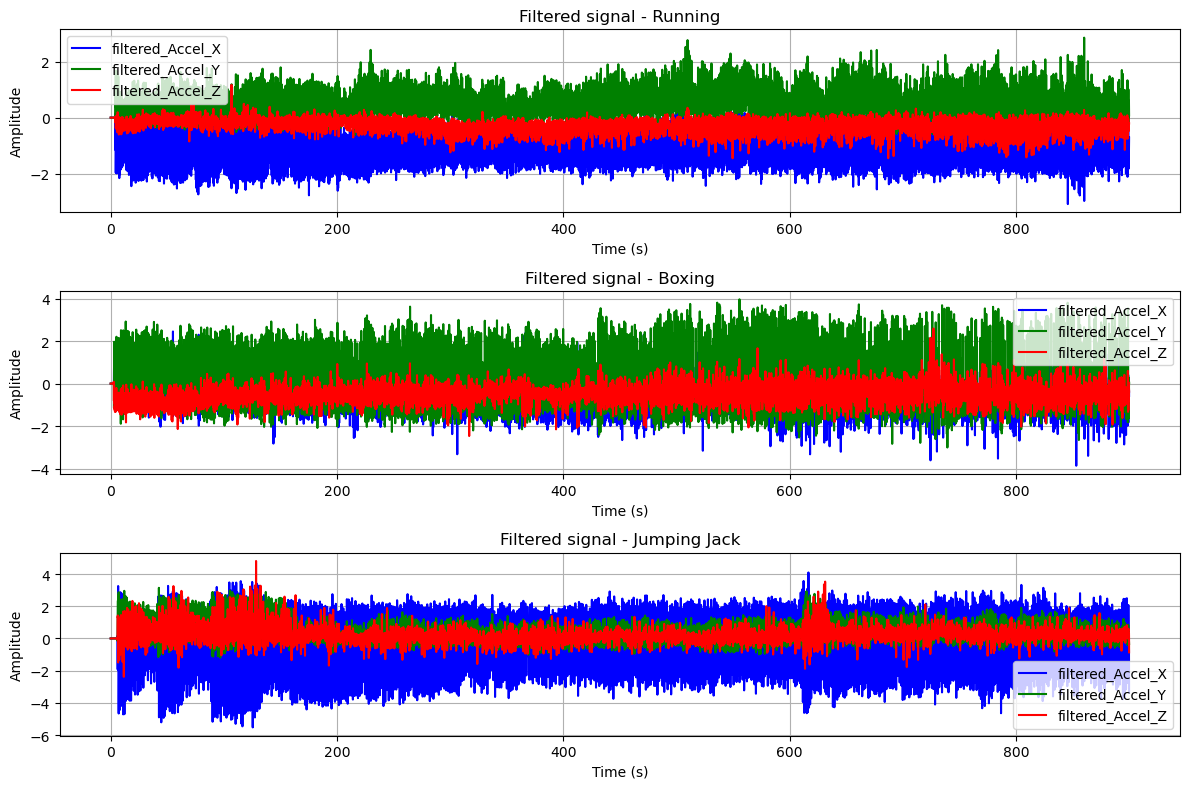

In [199]:
# Application of the low-pass filter (butterworth)
from scipy.signal import butter, filtfilt


cutoff_frequency = 10
fs = 100  # Sampling frequency


def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs  
    normal_cutoff = cutoff / nyquist  
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order)  
    y = filtfilt(b, a, data)  
    return y


# Paramètres du filtre
fs = 100  #  rate (Hz)
cutoff_frequency = 5.0  # Fréquence de coupure du filtre (en Hz)

acc_run['filtered_Accel_X'] = butter_lowpass_filter(Acc_run['Accel-X (g)'], cutoff_frequency, fs)
acc_run['filtered_Accel_Y'] = butter_lowpass_filter(Acc_run['Accel-Y (g)'], cutoff_frequency, fs)
acc_run['filtered_Accel_Z'] = butter_lowpass_filter(Acc_run['Accel-Z (g)'], cutoff_frequency, fs)
print(acc_run)

acc_box['filtered_Accel_X'] = butter_lowpass_filter(Acc_box['Accel-X (g)'], cutoff_frequency, fs)
acc_box['filtered_Accel_Y'] =  butter_lowpass_filter(Acc_box['Accel-Y (g)'], cutoff_frequency, fs)
acc_box['filtered_Accel_Z'] = butter_lowpass_filter(Acc_box['Accel-Z (g)'], cutoff_frequency, fs)


acc_jump['filtered_Accel_X'] = butter_lowpass_filter(Acc_jump['Accel-X (g)'], cutoff_frequency, fs)
acc_jump['filtered_Accel_Y'] = butter_lowpass_filter(Acc_jump['Accel-Y (g)'], cutoff_frequency, fs)
acc_jump['filtered_Accel_Z']= butter_lowpass_filter(Acc_jump['Accel-Z (g)'], cutoff_frequency, fs)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, acc_run['filtered_Accel_X'] , label='filtered_Accel_X', color='blue')  
plt.plot(time, acc_run['filtered_Accel_Y'] , label='filtered_Accel_Y', color='green') 
plt.plot(time, acc_run['filtered_Accel_Z'] , label='filtered_Accel_Z', color='red')   

plt.title('Filtered signal - Running')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time, acc_box['filtered_Accel_X'], label='filtered_Accel_X', color='blue')  
plt.plot(time, acc_box['filtered_Accel_Y'], label='filtered_Accel_Y', color='green') 
plt.plot(time, acc_box['filtered_Accel_Z'], label='filtered_Accel_Z', color='red')  

plt.title('Filtered signal - Boxing')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time, acc_jump['filtered_Accel_X'], label='filtered_Accel_X', color='blue')  
plt.plot(time, acc_jump['filtered_Accel_Y'], label='filtered_Accel_Y', color='green') 
plt.plot(time, acc_jump['filtered_Accel_Z'], label='filtered_Accel_Z', color='red')  

plt.title('Filtered signal - Jumping Jack')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




##### **Count of duration in each intensity level** 

In [201]:
import numpy as np
import pandas as pd

# Example data (replace with your actual filtered signals)
running_signal = pd.DataFrame({
    "time": np.linspace(0, 900, 90000),
    "Accel_X": np.random.uniform(-2, 2, 90000),
    "Accel_Y": np.random.uniform(-4, 4, 90000),
    "Accel_Z": np.random.uniform(-3, 3, 90000)
})

boxing_signal = pd.DataFrame({
    "time": np.linspace(0, 900, 90000),
    "Accel_X": np.random.uniform(-1, 1, 90000),
    "Accel_Y": np.random.uniform(-3, 3, 90000),
    "Accel_Z": np.random.uniform(-2, 2, 90000)
})

jumping_signal = pd.DataFrame({
    "time": np.linspace(0, 900, 90000),
    "Accel_X": np.random.uniform(-3, 3, 90000),
    "Accel_Y": np.random.uniform(-4, 4, 90000),
    "Accel_Z": np.random.uniform(-2, 2, 90000)
})

# Define intensity thresholds for each activity
thresholds = {
    "Running": {"Low": 1, "Moderate": 2},
    "Boxe": {"Low": 0.5, "Moderate": 1.5},
    "Jump": {"Low": 1.5, "Moderate": 3}
}

# Function to calculate durations for each intensity level
def calculate_durations(signal, axis, low_thresh, moderate_thresh):
    low_duration = 0
    moderate_duration = 0
    high_duration = 0

    for i in range(len(signal) - 1):
        value = abs(signal[axis].iloc[i])
        dt = signal["time"].iloc[i + 1] - signal["time"].iloc[i]

        if value < low_thresh:
            low_duration += dt
        elif low_thresh <= value < moderate_thresh:
            moderate_duration += dt
        else:
            high_duration += dt

    return low_duration, moderate_duration, high_duration

# Analyze signals for all activities
activities = {
    "Running": running_signal,
    "Boxe": boxing_signal,
    "Jump": jumping_signal
}

results = []

for activity, signal in activities.items():
    low_thresh = thresholds[activity]["Low"]
    moderate_thresh = thresholds[activity]["Moderate"]

    for axis in ["Accel_X", "Accel_Y", "Accel_Z"]:
        low, moderate, high = calculate_durations(signal, axis, low_thresh, moderate_thresh)
        results.append({
            "Activity": activity,
            "Signal": axis,
            "Low Intensity (s)": low,
            "Moderate Intensity (s)": moderate,
            "High Intensity (s)": high
        })

results_table = pd.DataFrame(results)


def style_results_table(df):
    styled = (
        df.style
        .background_gradient(subset=["Low Intensity (s)"], cmap="Blues")  # Blue gradient for Low
        .background_gradient(subset=["Moderate Intensity (s)"], cmap="Greens")  # Green gradient for Moderate
        .background_gradient(subset=["High Intensity (s)"], cmap="Reds")  # Red gradient for High
        .set_properties(**{
            'border': '1px solid black',  # Add border to all cells
            'text-align': 'center'  # Center-align text
        })
        .set_table_styles([
            {'selector': 'thead th', 'props': [('background-color', '#D3D3D3'), ('color', 'black'), ('border', '1px solid black')]}
        ])  # Style the header
    )
    return styled


styled_results = style_results_table(results_table)

styled_results


,Activity,Signal,Low Intensity (s),Moderate Intensity (s),High Intensity (s)
0,Running,Accel_X,450.125001,449.874999,0.000000
1,Running,Accel_Y,225.282503,225.522506,449.194991
2,Running,Accel_Z,300.543339,298.733319,300.723341
3,Boxe,Accel_X,449.554995,450.445005,0.000000
4,Boxe,Accel_Y,149.731664,302.303359,447.964977
5,Boxe,Accel_Z,227.012522,449.514995,223.472483
6,Jump,Accel_X,449.784998,450.215002,0.000000
7,Jump,Accel_Y,339.213769,336.923744,223.862487
8,Jump,Accel_Z,674.887499,225.112501,0.000000


In [202]:
# Calculate descriptive statistics for Running, Boxing, Jumping Jack
activities = {"Running": running_signal, "Boxe": boxing_signal, "Jump": jumping_signal}

for activity_name, signal_data in activities.items():
    print(f"Statistiques pour {activity_name}:")
    print(signal_data[["Accel_X", "Accel_Y", "Accel_Z"]].describe(percentiles=[0.25, 0.5, 0.75]))
    print("\n")


Statistiques pour Running:
            Accel_X       Accel_Y       Accel_Z
count  90000.000000  90000.000000  90000.000000
mean      -0.000491      0.007474      0.006994
std        1.153379      2.308263      1.734088
min       -1.999978     -3.999962     -2.999986
25%       -0.999181     -1.993439     -1.498384
50%        0.003064      0.007679      0.010259
75%        1.000140      1.999041      1.506026
max        1.999968      3.999915      2.999876


Statistiques pour Boxe:
            Accel_X       Accel_Y       Accel_Z
count  90000.000000  90000.000000  90000.000000
mean      -0.001018     -0.004191      0.005246
std        0.577042      1.730107      1.152410
min       -0.999996     -2.999813     -1.999998
25%       -0.502224     -1.496832     -0.993610
50%       -0.001627     -0.001257      0.010004
75%        0.498846      1.490426      1.001713
max        0.999989      2.999922      1.999993


Statistiques pour Jump:
            Accel_X       Accel_Y       Accel_Z
count  90

##### **ENMO « Euclidian Norm Minus One »**

√(x² + y² + z²) − 1 (avec 1 valeur de gravité)

https://www.sciencedirect.com/science/article/pii/S0398762018314858

In [25]:
def ENMO (acc_data):
    acc_data['ENMO'] = np.sqrt(acc_data['filtered_Accel_X']**2 + acc_data['filtered_Accel_Y']**2 + acc_data['filtered_Accel_Z']**2) - 1  # formula
    acc_data['ENMO'] = acc_data['ENMO'].clip(lower=0)  # data normalisation 
    ENMO=acc_data[['ENMO']]
    return ENMO

In [49]:
# ENMO function
ENMO_run=scaling(acc_run)
ENMO_box=scaling(acc_box)
ENMO_jump=scaling(acc_jump)

In [28]:
ENMO_run = ENMO(acc_run)
ENMO_box = ENMO(acc_box)
ENMO_jump = ENMO(acc_jump)

In [ ]:
ENMO_run

,ENMO
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
89995,0.030213
89996,0.000000
89997,0.000000
89998,0.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


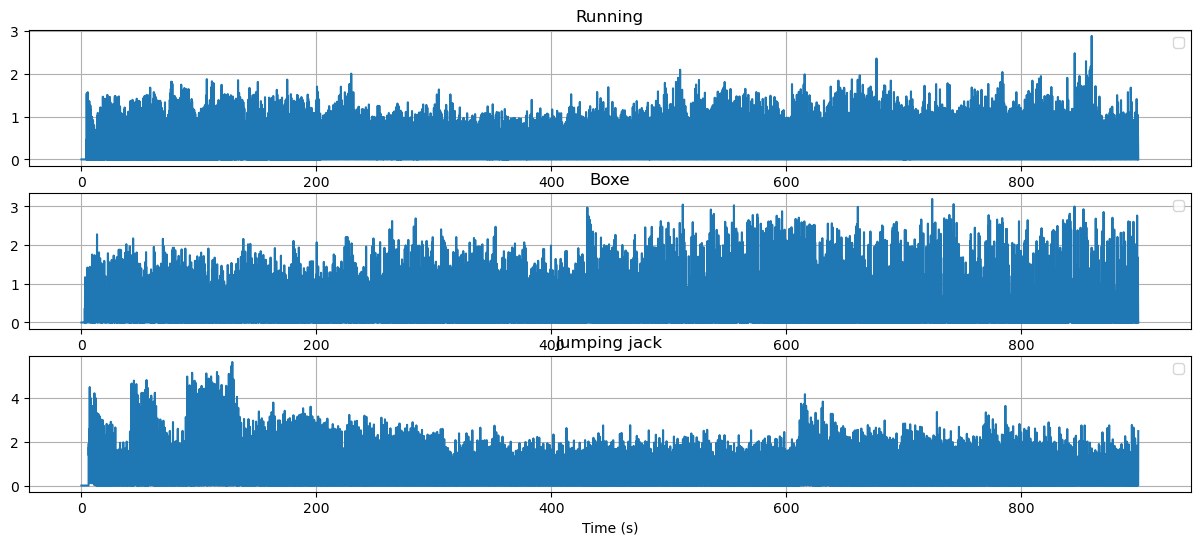

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

plt.subplot(3,1,1)

plt.plot(time,ENMO_run)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Running')
plt.gca().legend()
plt.grid()

plt.subplot(3,1,2)

plt.plot(time,ENMO_box)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Boxe')
plt.gca().legend()
plt.grid()

plt.subplot(3,1,3)

plt.plot(time,ENMO_jump)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Jumping jack')
plt.gca().legend()
plt.grid()


##### **Integration over EPOCH**

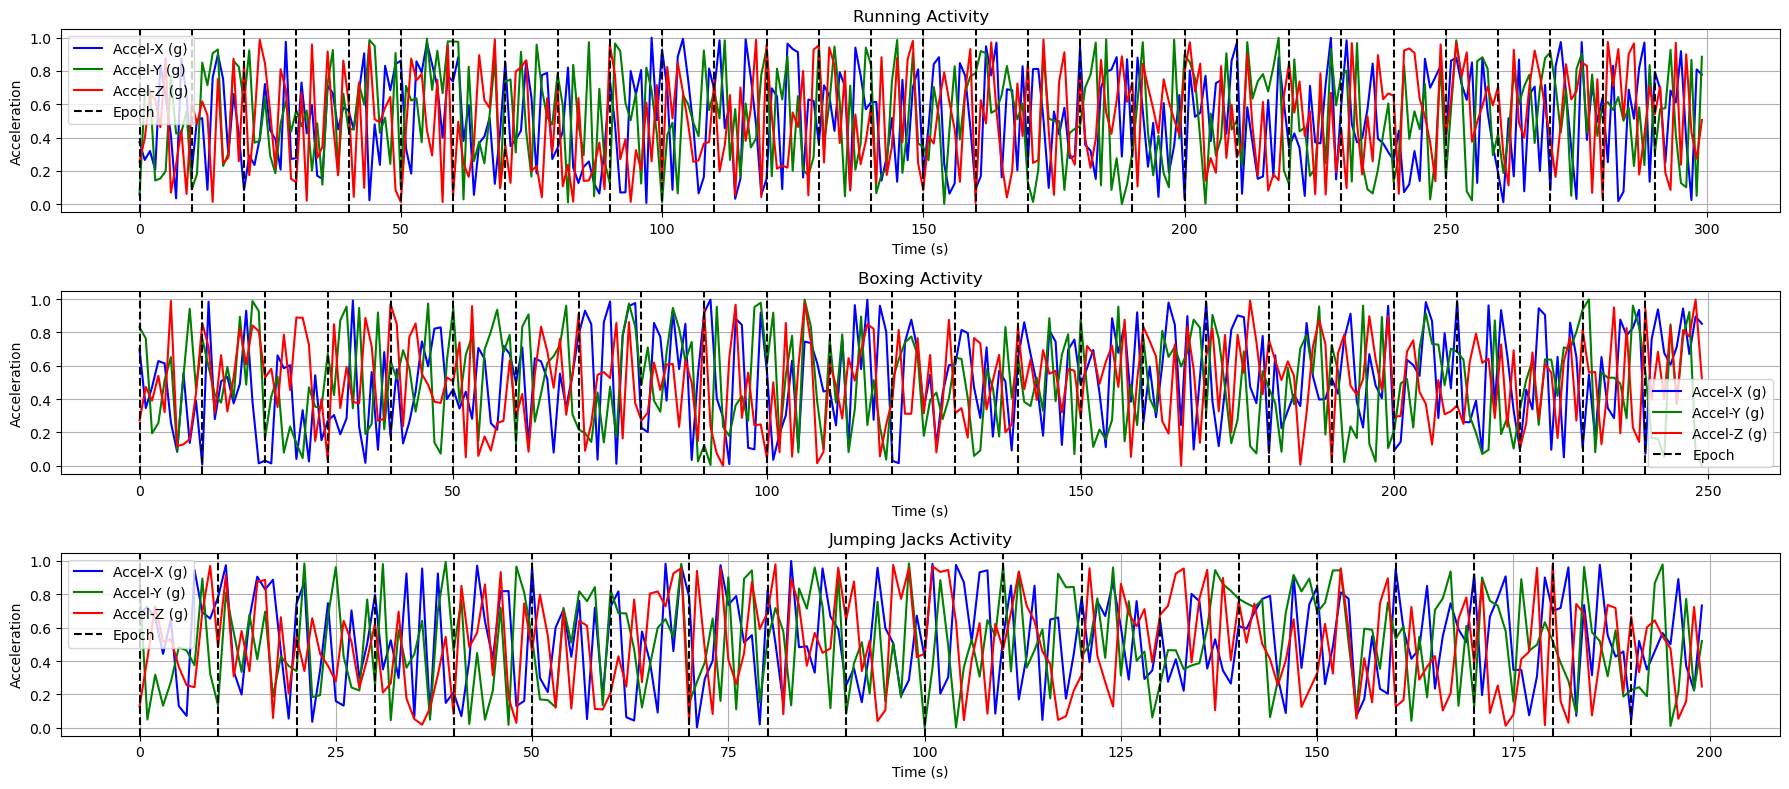

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


time_run = np.arange(0, 300, 1)  
time_box = np.arange(0, 250, 1)  
time_jump = np.arange(0, 200, 1)  


Acc_run = np.random.rand(len(time_run), 3)  
Acc_box = np.random.rand(len(time_box), 3)  
Acc_jump = np.random.rand(len(time_jump), 3)  


epoch_size = 10


epochs_run = np.arange(0, len(time_run), epoch_size)
epochs_box = np.arange(0, len(time_box), epoch_size)
epochs_jump = np.arange(0, len(time_jump), epoch_size)


plt.figure(figsize=(18, 8))


plt.subplot(3, 1, 1)
plt.plot(time_run, Acc_run[:, 0], label='Accel-X (g)', color='blue')
plt.plot(time_run, Acc_run[:, 1], label='Accel-Y (g)', color='green')
plt.plot(time_run, Acc_run[:, 2], label='Accel-Z (g)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.title('Running Activity')
for epoch in epochs_run:
    plt.axvline(x=epoch, color='black', linestyle='--', label='Epoch' if epoch == epochs_run[0] else "")  
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(time_box, Acc_box[:, 0], label='Accel-X (g)', color='blue')
plt.plot(time_box, Acc_box[:, 1], label='Accel-Y (g)', color='green')
plt.plot(time_box, Acc_box[:, 2], label='Accel-Z (g)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.title('Boxing Activity')
for epoch in epochs_box:
    plt.axvline(x=epoch, color='black', linestyle='--', label='Epoch' if epoch == epochs_box[0] else "")  
plt.legend()
plt.grid()


plt.subplot(3, 1, 3)
plt.plot(time_jump, Acc_jump[:, 0], label='Accel-X (g)', color='blue')
plt.plot(time_jump, Acc_jump[:, 1], label='Accel-Y (g)', color='green')
plt.plot(time_jump, Acc_jump[:, 2], label='Accel-Z (g)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.title('Jumping Jacks Activity')
for epoch in epochs_jump:
    plt.axvline(x=epoch, color='black', linestyle='--', label='Epoch' if epoch == epochs_jump[0] else "")  
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()







####  3. Estimated energy costs

##### **Calcul de la magnitude vectorielle (VM)**

In [203]:
# Calcul de la magnitude vectorielle (VM)
acc_run['vm'] = np.sqrt(acc_run['filtered_Accel_X']**2 + acc_run['filtered_Accel_Y']**2 + acc_run['filtered_Accel_Z']**2)
acc_box['vm'] = np.sqrt(acc_box['filtered_Accel_X']**2 + acc_box['filtered_Accel_Y']**2 + acc_box['filtered_Accel_Z']**2)
acc_jump['vm'] = np.sqrt(acc_jump['filtered_Accel_X']**2 + acc_jump['filtered_Accel_Y']**2 + acc_jump['filtered_Accel_Z']**2)

# Afficher un aperçu des données prétraitées
acc_run
acc_box
acc_jump

,Time,Accel-X (g),Accel-Y (g),Accel-Z (g),filtered_Accel_X,filtered_Accel_Y,filtered_Accel_Z,vm
0,2024-11-26 23:46:00.000,0.000000,0.000000,0.000000,1.034963e-32,-8.909565e-33,-6.301252e-33,1.503998e-32
1,2024-11-26 23:46:00.009,0.000000,0.000000,0.000000,6.873013e-33,-5.033390e-33,-5.258366e-33,1.001118e-32
2,2024-11-26 23:46:00.019,0.000000,0.000000,0.000000,1.700852e-33,4.412784e-34,-3.351987e-33,3.784632e-33
3,2024-11-26 23:46:00.029,0.000000,0.000000,0.000000,-5.047464e-33,7.335435e-33,-5.621362e-34,8.921967e-33
4,2024-11-26 23:46:00.039,0.000000,0.000000,0.000000,-1.304554e-32,1.526448e-32,3.038445e-33,2.030819e-32
...,...,...,...,...,...,...,...,...
89995,2024-11-27 00:00:59.950,-1.490479,-0.382324,0.502441,-1.818738e+00,-2.570209e-01,-3.883541e-02,1.837220e+00
89996,2024-11-27 00:00:59.960,-1.997803,-0.457275,0.069336,-2.179313e+00,-2.795726e-01,-2.138475e-01,2.207555e+00
89997,2024-11-27 00:00:59.970,-2.551514,-0.356201,-0.531738,-2.565728e+00,-3.014555e-01,-4.146078e-01,2.616436e+00
89998,2024-11-27 00:00:59.980,-3.076660,-0.197754,-0.932617,-2.967222e+00,-3.222734e-01,-6.332955e-01,3.051120e+00


##### **Extraction des Caractéristiques**

Divisez les données en fenêtres temporelles pour calculer les caractéristiques.

In [206]:
# segmentation parameters
window_size = 10 # car enregistrements petit 
stride = 5  # chevauchement des fenêtres

def feature (data):
    # Liste pour stocker les caractéristiques
    features = []

    # Extraction des caractéristiques
    for start in range(0, len(data) - window_size, stride):
        window = data.iloc[start:start + window_size]
        mean_vm = window['vm'].mean()
        std_vm = window['vm'].std()
        features.append([mean_vm, std_vm])

    # Convertir en DataFrame
    features = pd.DataFrame(features, columns=['mean_vm', 'std_vm'])

    return features

In [207]:
feature_run = feature(acc_run)
feature_jump = feature(acc_jump)
feature_box = feature(acc_box)

In [208]:
feature_run

,mean_vm,std_vm
0,1.044476e-21,4.232329e-22
1,2.195252e-21,1.693208e-21
2,3.683203e-21,1.641569e-21
3,6.843940e-21,5.076191e-21
4,1.318565e-20,6.031700e-21
...,...,...
17993,1.644277e+00,1.912755e-02
17994,1.628186e+00,3.522395e-02
17995,1.562281e+00,4.498483e-02
17996,1.479167e+00,5.813674e-02


In [209]:
feature_box

,mean_vm,std_vm
0,1.332229e-15,7.283154e-16
1,2.972694e-15,1.805195e-15
2,4.227691e-15,1.794231e-15
3,9.772203e-15,6.635903e-15
4,1.370122e-14,4.630048e-15
...,...,...
17993,1.593557e+00,4.353816e-01
17994,2.029210e+00,1.610179e-01
17995,1.772390e+00,3.963177e-01
17996,1.057154e+00,4.662254e-01


In [210]:
feature_jump

,mean_vm,std_vm
0,3.228738e-32,2.404144e-32
1,4.616970e-32,1.733589e-32
2,1.024853e-31,7.892142e-32
3,1.598233e-31,6.678450e-32
4,3.219083e-31,2.444308e-31
...,...,...
17993,3.193920e-01,1.622455e-01
17994,2.023069e-01,7.062724e-02
17995,2.894610e-01,8.660309e-02
17996,4.197491e-01,9.008522e-02


##### **Estimation de la Dépense Énergétique avec les METs**

In [211]:
# Fonction pour estimer les METs en fonction de mean_vm et std_vm
def estimate_mets(features):
    # Coefficients basés sur l'intensité de l'activité
    features['METs'] = 0.5 * features['mean_vm'] + 0.3 * features['std_vm']  # Ajuster ces coefficients si nécessaire
    return features

feature_run = estimate_mets(feature_run)
feature_jump = estimate_mets(feature_jump)
feature_box = estimate_mets(feature_box)

# Affichage des résultats
print(feature_run[['mean_vm', 'std_vm', 'METs']].head())
print(feature_jump[['mean_vm', 'std_vm', 'METs']].head())
print(feature_box[['mean_vm', 'std_vm', 'METs']].head())

        mean_vm        std_vm          METs
0  1.044476e-21  4.232329e-22  6.492079e-22
1  2.195252e-21  1.693208e-21  1.605588e-21
2  3.683203e-21  1.641569e-21  2.334072e-21
3  6.843940e-21  5.076191e-21  4.944827e-21
4  1.318565e-20  6.031700e-21  8.402337e-21
        mean_vm        std_vm          METs
0  3.228738e-32  2.404144e-32  2.335612e-32
1  4.616970e-32  1.733589e-32  2.828562e-32
2  1.024853e-31  7.892142e-32  7.491910e-32
3  1.598233e-31  6.678450e-32  9.994699e-32
4  3.219083e-31  2.444308e-31  2.342834e-31
        mean_vm        std_vm          METs
0  1.332229e-15  7.283154e-16  8.846093e-16
1  2.972694e-15  1.805195e-15  2.027905e-15
2  4.227691e-15  1.794231e-15  2.652115e-15
3  9.772203e-15  6.635903e-15  6.876872e-15
4  1.370122e-14  4.630048e-15  8.239624e-15


In [212]:
# Poids du participant (en kg)
weight_kg = 68

# Calcul de la dépense énergétique en kcal/min
feature_run['kcal_per_min'] = feature_run['METs'] * weight_kg / 60
feature_jump['kcal_per_min'] = feature_jump['METs'] * weight_kg / 60
feature_box['kcal_per_min'] = feature_box['METs'] * weight_kg / 60

# Affichage des résultats
print(feature_run[['mean_vm', 'std_vm', 'METs', 'kcal_per_min']].head())
print(feature_jump[['mean_vm', 'std_vm', 'METs', 'kcal_per_min']].head())
print(feature_box[['mean_vm', 'std_vm', 'METs', 'kcal_per_min']].head())


        mean_vm        std_vm          METs  kcal_per_min
0  1.044476e-21  4.232329e-22  6.492079e-22  7.357690e-22
1  2.195252e-21  1.693208e-21  1.605588e-21  1.819667e-21
2  3.683203e-21  1.641569e-21  2.334072e-21  2.645282e-21
3  6.843940e-21  5.076191e-21  4.944827e-21  5.604138e-21
4  1.318565e-20  6.031700e-21  8.402337e-21  9.522648e-21
        mean_vm        std_vm          METs  kcal_per_min
0  3.228738e-32  2.404144e-32  2.335612e-32  2.647027e-32
1  4.616970e-32  1.733589e-32  2.828562e-32  3.205703e-32
2  1.024853e-31  7.892142e-32  7.491910e-32  8.490831e-32
3  1.598233e-31  6.678450e-32  9.994699e-32  1.132733e-31
4  3.219083e-31  2.444308e-31  2.342834e-31  2.655212e-31
        mean_vm        std_vm          METs  kcal_per_min
0  1.332229e-15  7.283154e-16  8.846093e-16  1.002557e-15
1  2.972694e-15  1.805195e-15  2.027905e-15  2.298293e-15
2  4.227691e-15  1.794231e-15  2.652115e-15  3.005730e-15
3  9.772203e-15  6.635903e-15  6.876872e-15  7.793789e-15
4  1.370122e-1

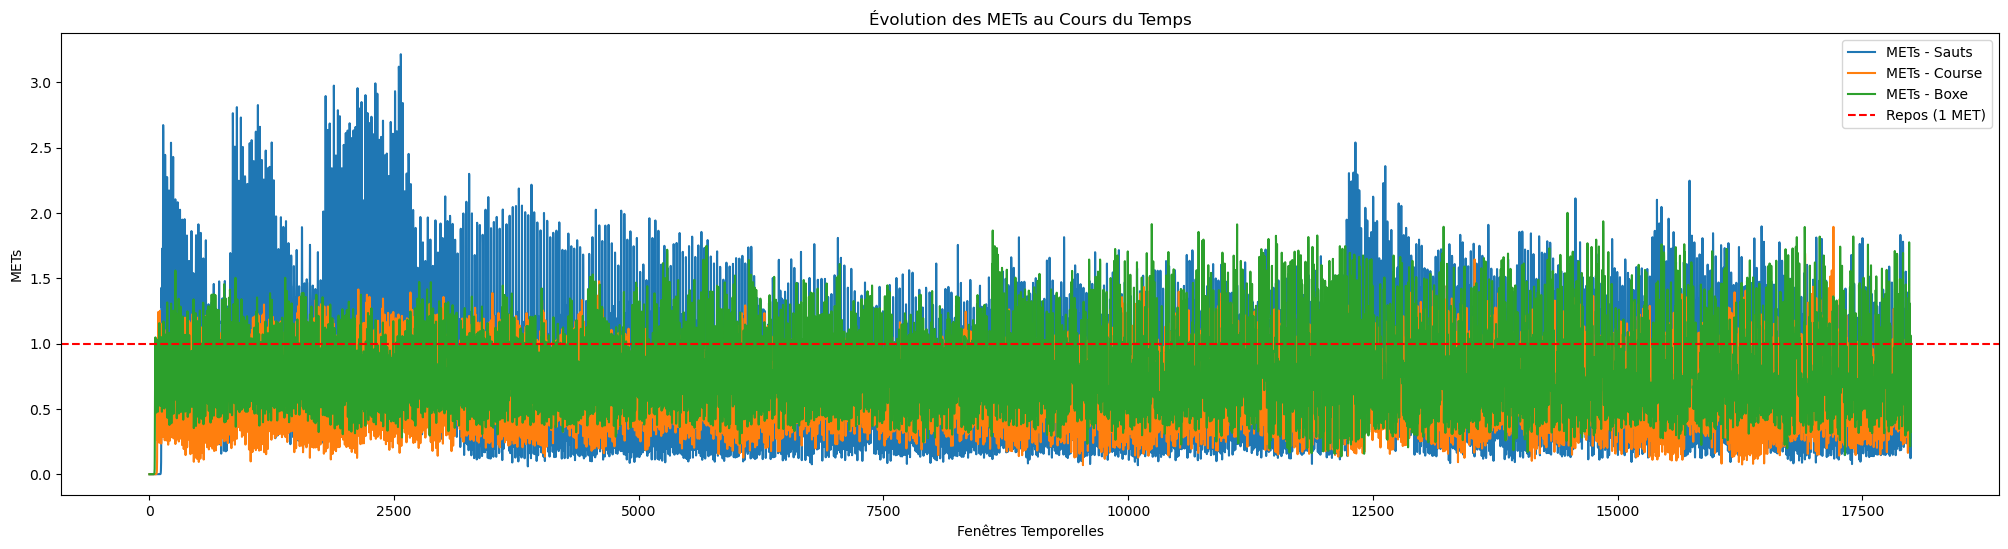

In [213]:
import matplotlib.pyplot as plt

# Tracer les METs pour chaque activité
plt.figure(figsize=(25, 6))
plt.plot(feature_jump['METs'], label='METs - Sauts')
plt.plot(feature_run['METs'], label='METs - Course')
plt.plot(feature_box['METs'], label='METs - Boxe')
plt.axhline(y=1, color='r', linestyle='--', label='Repos (1 MET)')
plt.xlabel('Fenêtres Temporelles')
plt.ylabel('METs')
plt.title('Évolution des METs au Cours du Temps')
plt.legend()
plt.show()
